In [7]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



In [45]:
water <- read.csv('data/waterQuality1.csv')|>
    mutate(is_safe = as_factor(is_safe))|>
    mutate(is_safe = fct_recode(is_safe, 'safe' = '1', 'not safe' = '0'))
slice_sample(water, n = 5)

aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,⋯,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.09,23.4,0.07,0.86,0.03,0.67,0.06,1.97,0.12,0.52,⋯,0.121,10.85,1.09,0.002,1.42,4.94,0.08,0.01,0.01,not safe
0.03,28.13,0.04,0.68,0.07,0.03,0.00,1.12,0.53,0.14,⋯,0.159,14.47,1.91,0.006,4.33,0.27,0.02,0.06,0.03,not safe
0.04,28.35,0.06,0.56,0.03,0.59,0.06,0.04,1.29,0.00,⋯,0.134,12.33,0.51,0.005,3.15,0.29,0.08,0.02,0.05,not safe
0.39,26.55,0.07,1.56,0.03,5.07,0.67,1.99,0.08,0.10,⋯,0.172,17.61,2.14,0.001,46.86,0.01,0.08,0.02,0.02,safe
0.06,14.91,0.03,1.46,0.09,0.07,0.01,0.09,0.65,0.00,⋯,0.120,3.01,0.72,0.002,2.04,0.43,0.05,0.08,0.04,not safe


^This is a small glimpse of our data set. There are 20 variables and one class variable which will be used as our predicting class. Our prediction will be based on the amount of different materials in water samples which will be used to predict if water is safe or not.

In [9]:
water_split <- initial_split(water, prop = 0.75, strata = is_safe)
water_train <- training(water_split)
water_test <- testing(water_split)

In [46]:
water_train_table <- water_train |>
    group_by(is_safe)|>
    summarize(count = n())|>
    mutate(percentage = count / nrow(water_train) * 100)
water_train_table

is_safe,count,percentage
<fct>,<int>,<dbl>
safe,684,11.4038
not safe,5314,88.5962


^This table represents the amount and proportion of water samples that are safe and are not in the training data set. 

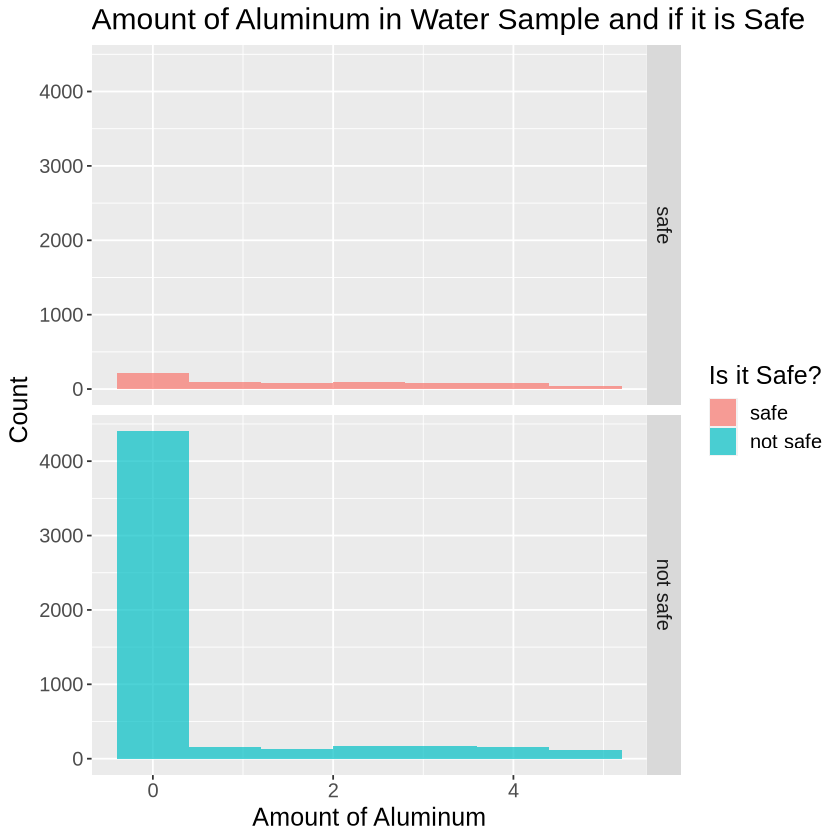

In [36]:
water_train_plot <- water_train |>
    ggplot(aes(x = aluminium, fill = is_safe)) +
    geom_histogram(alpha = 0.7, position = 'identity', binwidth = 0.8) +
    facet_grid(rows = vars(is_safe)) +
    labs(x = 'Amount of Aluminum', y = 'Count', fill = 'Is it Safe?') +
    theme(text = element_text(size = 15)) +
    ggtitle('Amount of Aluminum in Water Sample and if it is Safe')
water_train_plot

^This is one of many plots that can describe our situation. In this case, the frequency of levels of aluminum in water is plotted, and whether the sample is safe or not is represented as seperate plots and colors. This was plotted using the training data set.